# Introduction to Scikit-learn

## 1. Importing Libs

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## 2. Load DataSets

In [12]:
data_df = pd.read_csv("../Databases/Data.csv")

In [13]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## 3. Data Imputation

In [15]:
data_df.info()
# Age and Salary is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [20]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = ( missing_data / len(data_df[col]) ) * 100
    print(f"Column {col} : has {missing_percent}% missing data")

Column Country : has 0.0% missing data
Column Age : has 10.0% missing data
Column Salary : has 10.0% missing data
Column Purchased : has 0.0% missing data


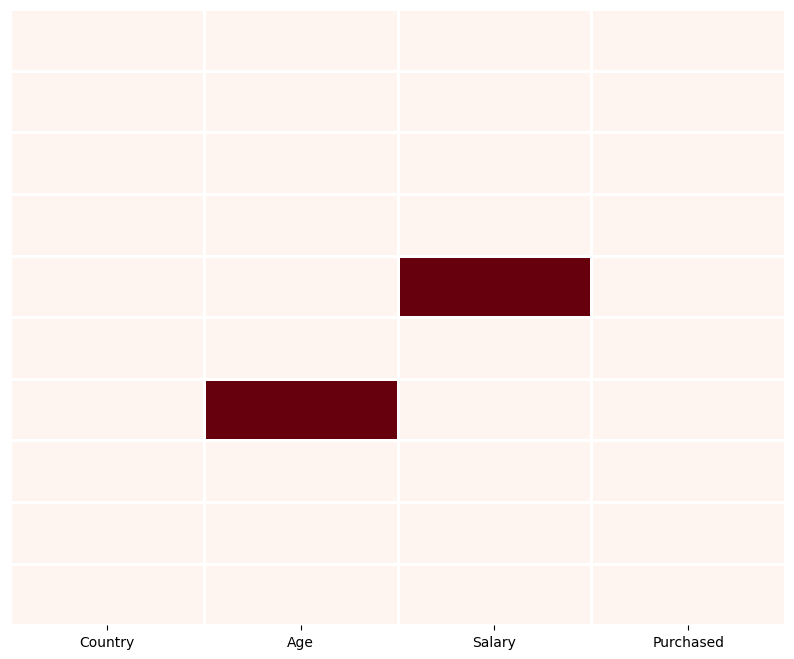

In [85]:
# Visualization
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_df.isna(), cmap='Reds', cbar=False, yticklabels=False, linecolor="w", linewidths=1);

In [33]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [68]:
x = data_df.iloc[:,0:-1].values
y = data_df.iloc[:,-1].values

In [69]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [70]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [71]:
x
# Fixed NaN to average of column

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## 4. Encode Categorical Data

### a. Encode independent Var x

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [73]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, nan],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, nan, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### b. Encode dependent Var y

In [74]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

## 5. Split the Dataset

In [87]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, )

In [89]:
# Compare
x_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, nan],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, nan, 52000.0]], dtype=object)

## 6. Feature Scaling